<a href="https://colab.research.google.com/github/JayThibs/Machine-Learning-With-Tabular-Data/blob/master/Fast_AI_Tabular_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Data

There's a common myth that you shouldn't use deep learning when you are doing machine learning with tabular data. The main argument is that you don't have enough data to train a good ML model if you are using DL, and you should instead use a technique like XGBoost.

The myth is just that, a myth. Jeremy Howard from fast.ai now uses deep learning to tackle ~90% of problems with tabular data. It is still worth it to try building a neural net and compare it to another algorithm like random forest (easy to build). You can play around with them and then choose which one performs better. Just don't leave out neural nets because someone on reddit told it doesn't work.

One of the reason people haven't been using deep learning with tabular data is that there was no framework that allowed to easily build DL models with tabular data. Until now. The fast.ai framework has a tabular modules which allows us to quickly build models with tabular data.

For this notebook, we'll assume that we've cleaned the data properly in advance and it fits well in a pandas `dataframe`.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *            # For quick access to most common functionality
from fastai.tabular import *    # For quick access to tabular functionality

In [3]:
## tabular assumes that the data is in a pandas dataframe.

path = untar_data(URLs.ADULT_SAMPLE) # simple dataset for testing
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


We need to seperate the features into two groups: categorical variables and continuous variables.

For categorical variables, we will be using embeddings in order to use them in our neural net.

For continuous variables, we can send them in the neural net like pixels can. We don't create embeddings for them.

In [0]:
dep_var = 'salary' # dependant variable: all of the adults making equal to or more than $50k
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 
             'relationship', 'race'] # categorical variables
cont_names = ['age', 'fnlwgt', 'education-num'] # continuous variables
procs = [FillMissing, Categorify, Normalize] # processes for pre-processing

For pre-processing, whatever we do to the training set, we need to do the same for the validation and testing sets.

FillMissing replaces a missing value with the median and add a new binary column which says whether that row has a missing value or not.



In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names,
                            procs=procs)
                            .split_by_idx(list(range(800,1000))) # spliting for training/validation sets
                            .label_from_df(cols=dep_var)
                            .add_test(test, label=0) # adding our test set
                            .databunch())

In [7]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,False,-1.2891,1.0972,-0.0312,<50k
Private,11th,Married-spouse-absent,Handlers-cleaners,Own-child,White,False,-1.2891,0.2239,-1.2046,<50k
Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,False,-0.4095,0.7408,-0.0312,<50k
Private,Bachelors,Married-civ-spouse,Sales,Husband,White,False,3.7685,1.1516,1.1422,<50k
Private,Masters,Never-married,Machine-op-inspct,Not-in-family,White,False,-0.8493,-0.1044,1.5334,<50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,White,False,1.5695,-0.8938,-0.0312,<50k
Private,HS-grad,Never-married,Craft-repair,Own-child,White,False,-0.9226,1.6798,-0.4224,<50k
Federal-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,Black,False,0.6899,0.2434,-0.4224,>=50k
Self-emp-not-inc,Bachelors,Separated,Craft-repair,Not-in-family,White,False,0.6899,-1.3093,1.1422,<50k
Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,False,-0.6294,1.5830,1.1422,<50k


In [0]:
# layers is where we are defining our architecture
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

We can use the learning rate finder function to get a better idea of which learning rate we should choose.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


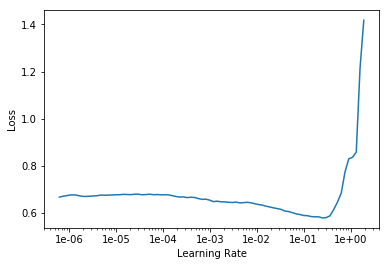

In [12]:
learn.lr_find()
learn.recorder.plot(skip_end=1)

In [13]:
learn.fit(1, 2e-1) # fitting our on one epoch to see our starting accuracy

epoch,train_loss,valid_loss,accuracy,time
0,0.457744,0.396414,0.830000,00:05


There we are! We have a deep learning model with tabular data. We trained our model on one epoch to see our initial accuracy. This is helpful to get an idea on how to move forward.

## Inference



In [0]:
row = df.iloc[0]

In [15]:
learn.predict(row)

(Category <50k, tensor(0), tensor([0.7453, 0.2547]))

We've covered some of the steps for building a model with tabular data in fast.ai.